Dear Students,

Please find the attached files containing Project of 15 marks and corresponding data. You have
to submit the project report before November 30, 2021 (Tuesday) by 5 PM. You have
to upload your code and report (which include all your findings, explanations and comparison etc).
Please keep your data, python code and report in a folder, zip it and upload the same on google classroom.

I am expecting the following.
Your code should be in working condition i.e. your code can read the data in your folder.
You have divided the data in training and testing.
You have done some feature scaling if required.
You have tested the performance of the model on training and testing.
You should be able to explain the conclusions made.
You
have done the basic exploratory data analysis i.e. summary of the data,
histograms of the features, correlation between features etc.
These are individual projects and everyone of you have to submit a separate report. Don't copy from others.

Note
that the data sets are from the prescribed book (ISLR). You can also
visit the website kaggle.com, to understand some of the datasets. If you
have any query, contact the TA.

## report -> findings explaination comparison

- read the data
- divide the data in training and testing
- feature scaling
- test the performance on training and test
- explain the conclusion 
- basic exploratory analysis
    - summary 
    - histogram
    - correlation

## MA515 Project
## Pranjali Bajpai 2018EEB1243

### Problem Statement
- Do exploratory data analysis on the data. Use logistic regression and LDA topredict whether a customer will buy Caravan Insurance policy. Compare the findings from different methods
### Dataset 
- Caravan.csv

In [152]:
# Import libraries
import pandas as pd
import numpy as np

# Read the dataset
data = pd.read_csv('Caravan.csv')

In [153]:
# View header of data
data.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


In [154]:
# Apply the labels to the columns to get better understanding of data
# TODO: Link to the column
labels = ['SerialNumber', 'CustomerSubtype', 'NumberOfHouses1', 'AvgSizeHousehold1', 'AvgAge', 'CustomerMainType', 'RomanCatholic', 'Protestant...', 'OtherReligion', 'NoReligion', 'Married', 'LivingTogether', 'OtherRelation', 'Singles', 'HouseholdWithoutChildren', 'HouseholdWithChildren', 'HighLevelEducation', 'MediumLevelEducation', 'LowerLevelEducation', 'HighStatus', 'Entrepreneur', 'Farmer', 'MiddleManagement', 'SkilledLabourers', 'UnskilledLabourers', 'SocialClassA', 'SocialClassB1', 'SocialClassB2', 'SocialClassC', 'SocialClassD', 'RentedHouse', 'HomeOwners', '1Car', '2Cars', 'NoCar', 'NationalHealthService', 'PrivateHealthInsurance', 'Income<30.000', 'Income30-45.000', 'Income45-75.000', 'Income75-122.000', 'Income>123.000', 'AverageIncome', 'PurchasingPowerClass', 'ContributionPrivateThirdPartyInsurance', 'ContributionThirdPartyInsurance(firms)...', 'ContributionThirdPartyInsurane(agriculture)', 'ContributionCarPolicies', 'ContributionDeliveryVanPolicies', 'ContributionMotorcycle/scooterPolicies', 'ContributionLorryPolicies', 'ContributionTrailerPolicies', 'ContributionTractorPolicies', 'ContributionAgriculturalMachinesPolicies', 'ContributionMopedPolicies', 'ContributionLifeInsurances', 'ContributionPrivateAccidentInsurancePolicies', 'ContributionFamilyAccidentsInsurancePolicies', 'ContributionDisabilityInsurancePolicies', 'ContributionFirePolicies', 'ContributionSurfboardPolicies', 'ContributionBoatPolicies', 'ContributionBicyclePolicies', 'ContributionPropertyInsurancePolicies', 'ContributionSocialSecurityInsurancePolicies', 'NumberOfPrivateThirdPartyInsurance1-12', 'NumberOfThirdPartyInsurance(firms)...', 'NumberOfThirdPartyInsurane(agriculture)', 'NumberOfCarPolicies', 'NumberOfDeliveryVanPolicies', 'NumberOfMotorcycle/scooterPolicies', 'NumberOfLorryPolicies', 'NumberOfTrailerPolicies', 'NumberOfTractorPolicies', 'NumberOfAgriculturalMachinesPolicies', 'NumberOfMopedPolicies', 'NumberOfLifeInsurances', 'NumberOfPrivateAccidentInsurancePolicies', 'NumberOfFamilyAccidentsInsurancePolicies', 'NumberOfDisabilityInsurancePolicies', 'NumberOfFirePolicies', 'NumberOfSurfboardPolicies', 'NumberOfBoatPolicies', 'NumberOfBicyclePolicies', 'NumberOfPropertyInsurancePolicies', 'NumberOfSocialSecurityInsurancePolicies', 'Purchase']
caravan_data = data.set_axis(labels, axis=1, inplace=False)

In [155]:
caravan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 87 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   SerialNumber                                  5822 non-null   int64 
 1   CustomerSubtype                               5822 non-null   int64 
 2   NumberOfHouses1                               5822 non-null   int64 
 3   AvgSizeHousehold1                             5822 non-null   int64 
 4   AvgAge                                        5822 non-null   int64 
 5   CustomerMainType                              5822 non-null   int64 
 6   RomanCatholic                                 5822 non-null   int64 
 7   Protestant...                                 5822 non-null   int64 
 8   OtherReligion                                 5822 non-null   int64 
 9   NoReligion                                    5822 non-null   int64 
 10  

In [156]:
caravan_data.describe()

,SerialNumber,CustomerSubtype,NumberOfHouses1,AvgSizeHousehold1,AvgAge,CustomerMainType,RomanCatholic,Protestant...,OtherReligion,NoReligion,...,NumberOfLifeInsurances,NumberOfPrivateAccidentInsurancePolicies,NumberOfFamilyAccidentsInsurancePolicies,NumberOfDisabilityInsurancePolicies,NumberOfFirePolicies,NumberOfSurfboardPolicies,NumberOfBoatPolicies,NumberOfBicyclePolicies,NumberOfPropertyInsurancePolicies,NumberOfSocialSecurityInsurancePolicies
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,2911.500000,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,1680.810965,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1456.250000,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2911.500000,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4366.750000,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5822.000000,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [157]:
caravan_data.dtypes

SerialNumber                                     int64
CustomerSubtype                                  int64
NumberOfHouses1                                  int64
AvgSizeHousehold1                                int64
AvgAge                                           int64
CustomerMainType                                 int64
RomanCatholic                                    int64
Protestant...                                    int64
OtherReligion                                    int64
NoReligion                                       int64
Married                                          int64
LivingTogether                                   int64
OtherRelation                                    int64
Singles                                          int64
HouseholdWithoutChildren                         int64
HouseholdWithChildren                            int64
HighLevelEducation                               int64
MediumLevelEducation                             int64
LowerLevel

In [158]:
# Count Null values
caravan_data.isnull().sum(axis=0)

SerialNumber                                    0
CustomerSubtype                                 0
NumberOfHouses1                                 0
AvgSizeHousehold1                               0
AvgAge                                          0
CustomerMainType                                0
RomanCatholic                                   0
Protestant...                                   0
OtherReligion                                   0
NoReligion                                      0
Married                                         0
LivingTogether                                  0
OtherRelation                                   0
Singles                                         0
HouseholdWithoutChildren                        0
HouseholdWithChildren                           0
HighLevelEducation                              0
MediumLevelEducation                            0
LowerLevelEducation                             0
HighStatus                                      0


In [159]:
# Count NA values
caravan_data.isna().sum(axis=0)

SerialNumber                                    0
CustomerSubtype                                 0
NumberOfHouses1                                 0
AvgSizeHousehold1                               0
AvgAge                                          0
CustomerMainType                                0
RomanCatholic                                   0
Protestant...                                   0
OtherReligion                                   0
NoReligion                                      0
Married                                         0
LivingTogether                                  0
OtherRelation                                   0
Singles                                         0
HouseholdWithoutChildren                        0
HouseholdWithChildren                           0
HighLevelEducation                              0
MediumLevelEducation                            0
LowerLevelEducation                             0
HighStatus                                      0


In [160]:
# Plot histogram

In [161]:
# Plot correlation

In [162]:
# Select predictors X
X = caravan_data.iloc[:, 1:-1].values
# Select response variable y
y = caravan_data.iloc[:, -1].values

In [163]:
# Count occurence of "Yes" and "No" in y
count_yes = (y == "Yes").sum()
count_no = (y == "No").sum()
print("Yes =", count_yes, "No =", count_no)
# Percentage of "Yes" and "No"
percent_yes = (count_yes*100)/(count_yes+count_no)
percent_no = (count_no*100)/(count_yes+count_no)
print("% Yes =", percent_yes, "% No =", percent_no)
# print(y)
# y[y=="No"]=0
# y[y=="Yes"]=1
# print(y)

Yes = 348 No = 5474
% Yes = 5.977327378907592 % No = 94.02267262109241


- It can be observed that the dataset is biased as class "Yes" comprises only 5.97% of the dataset and "No" class is in majority and comprises 94.02% of the dataset

In [164]:
# Split the dataset into training and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)
# todo see train size and random state

In [165]:
pd.options.display.max_rows = 1000
caravan_data = caravan_data.iloc[:, 1:-1]
print(caravan_data.mean(axis=0))

CustomerSubtype                                 24.253349
NumberOfHouses1                                  1.110615
AvgSizeHousehold1                                2.678805
AvgAge                                           2.991240
CustomerMainType                                 5.773617
RomanCatholic                                    0.696496
Protestant...                                    4.626932
OtherReligion                                    1.069907
NoReligion                                       3.258502
Married                                          6.183442
LivingTogether                                   0.883545
OtherRelation                                    2.290450
Singles                                          1.887667
HouseholdWithoutChildren                         3.230333
HouseholdWithChildren                            4.300240
HighLevelEducation                               1.461010
MediumLevelEducation                             3.351254
LowerLevelEduc

In [166]:
from sklearn.linear_model import LogisticRegression
c1 = LogisticRegression(max_iter=1000)
c1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [167]:
y_pred = c1.predict(X_test)

In [168]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [169]:
(y_pred== "Yes").sum()

3

In [170]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = c1.score(X_test, y_test)
print(cm)
print("Accuracy from logistic", accuracy)

[[1368    2]
 [  85    1]]
Accuracy from logistic 0.9402472527472527


In [174]:
(y_pred == "Yes").sum()

3

In [175]:
(y_test == "Yes").sum()

86

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

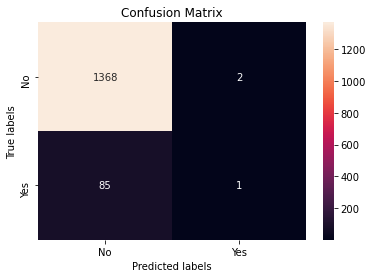

In [176]:
import seaborn as sns
from matplotlib import pyplot as plt
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

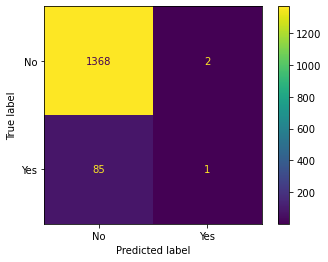

In [177]:
plot_confusion_matrix(c1, X_test, y_test)
plt.show()

## LDA

In [178]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
classifier2 = LDA()
classifier2.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = classifier2.score(X_test, y_test)
print("accuracy from LDA\t", accuracy)

[[1354   16]
 [  83    3]]
accuracy from LDA	 0.9320054945054945


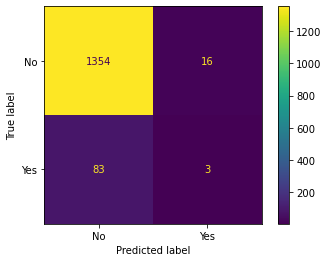

In [179]:
plot_confusion_matrix(classifier2, X_test, y_test)
plt.show()

In [184]:
########### ROC curve ###################
pred_prob1 = c1.predict_proba(X_test)
pred_prob2 = classifier2.predict_proba(X_test)

In [185]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


In [ ]:
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='LDA')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()